# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [46]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [47]:
DATASET_PATH = r"C:\Users\Mohammed Al-Muqsit\Desktop\Repo\ctpWeek1\ds-fall-2025-tue\Week-07-Classification\data\college_student_placement_dataset.csv"
RANDOM_STATE = 45

## Preliminary Inspection

See what the raw file looks like!

In [48]:
# Look at the first 5 lines of theraw contents of the file first.

with open(DATASET_PATH, 'r') as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break # Stop; there are less than 5 lines.


College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [49]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [50]:
# Identify which columns have null values. 
df.isnull().sum()


College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## Duplicate Rows Check
If so, remove the duplicates.

In [51]:
# Check to see if our data has any duplicate rows.
df.duplicated().sum()


np.int64(0)

Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [52]:
categorical_cols = ['Internship_Experience', 'Placement']
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [53]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience_Yes,Placement_Yes
0,CLG0030,107,6.61,6.28,8,8,8,4,False,False
1,CLG0061,97,5.52,5.37,8,7,8,0,False,False
2,CLG0036,109,5.36,5.83,9,3,1,1,False,False
3,CLG0055,122,5.47,5.75,6,1,6,1,True,False
4,CLG0004,96,7.91,7.69,7,8,10,2,False,False


❔ When should you use this versus using `pd.get_dummies`?

# Visualization with `sns.pairplot`

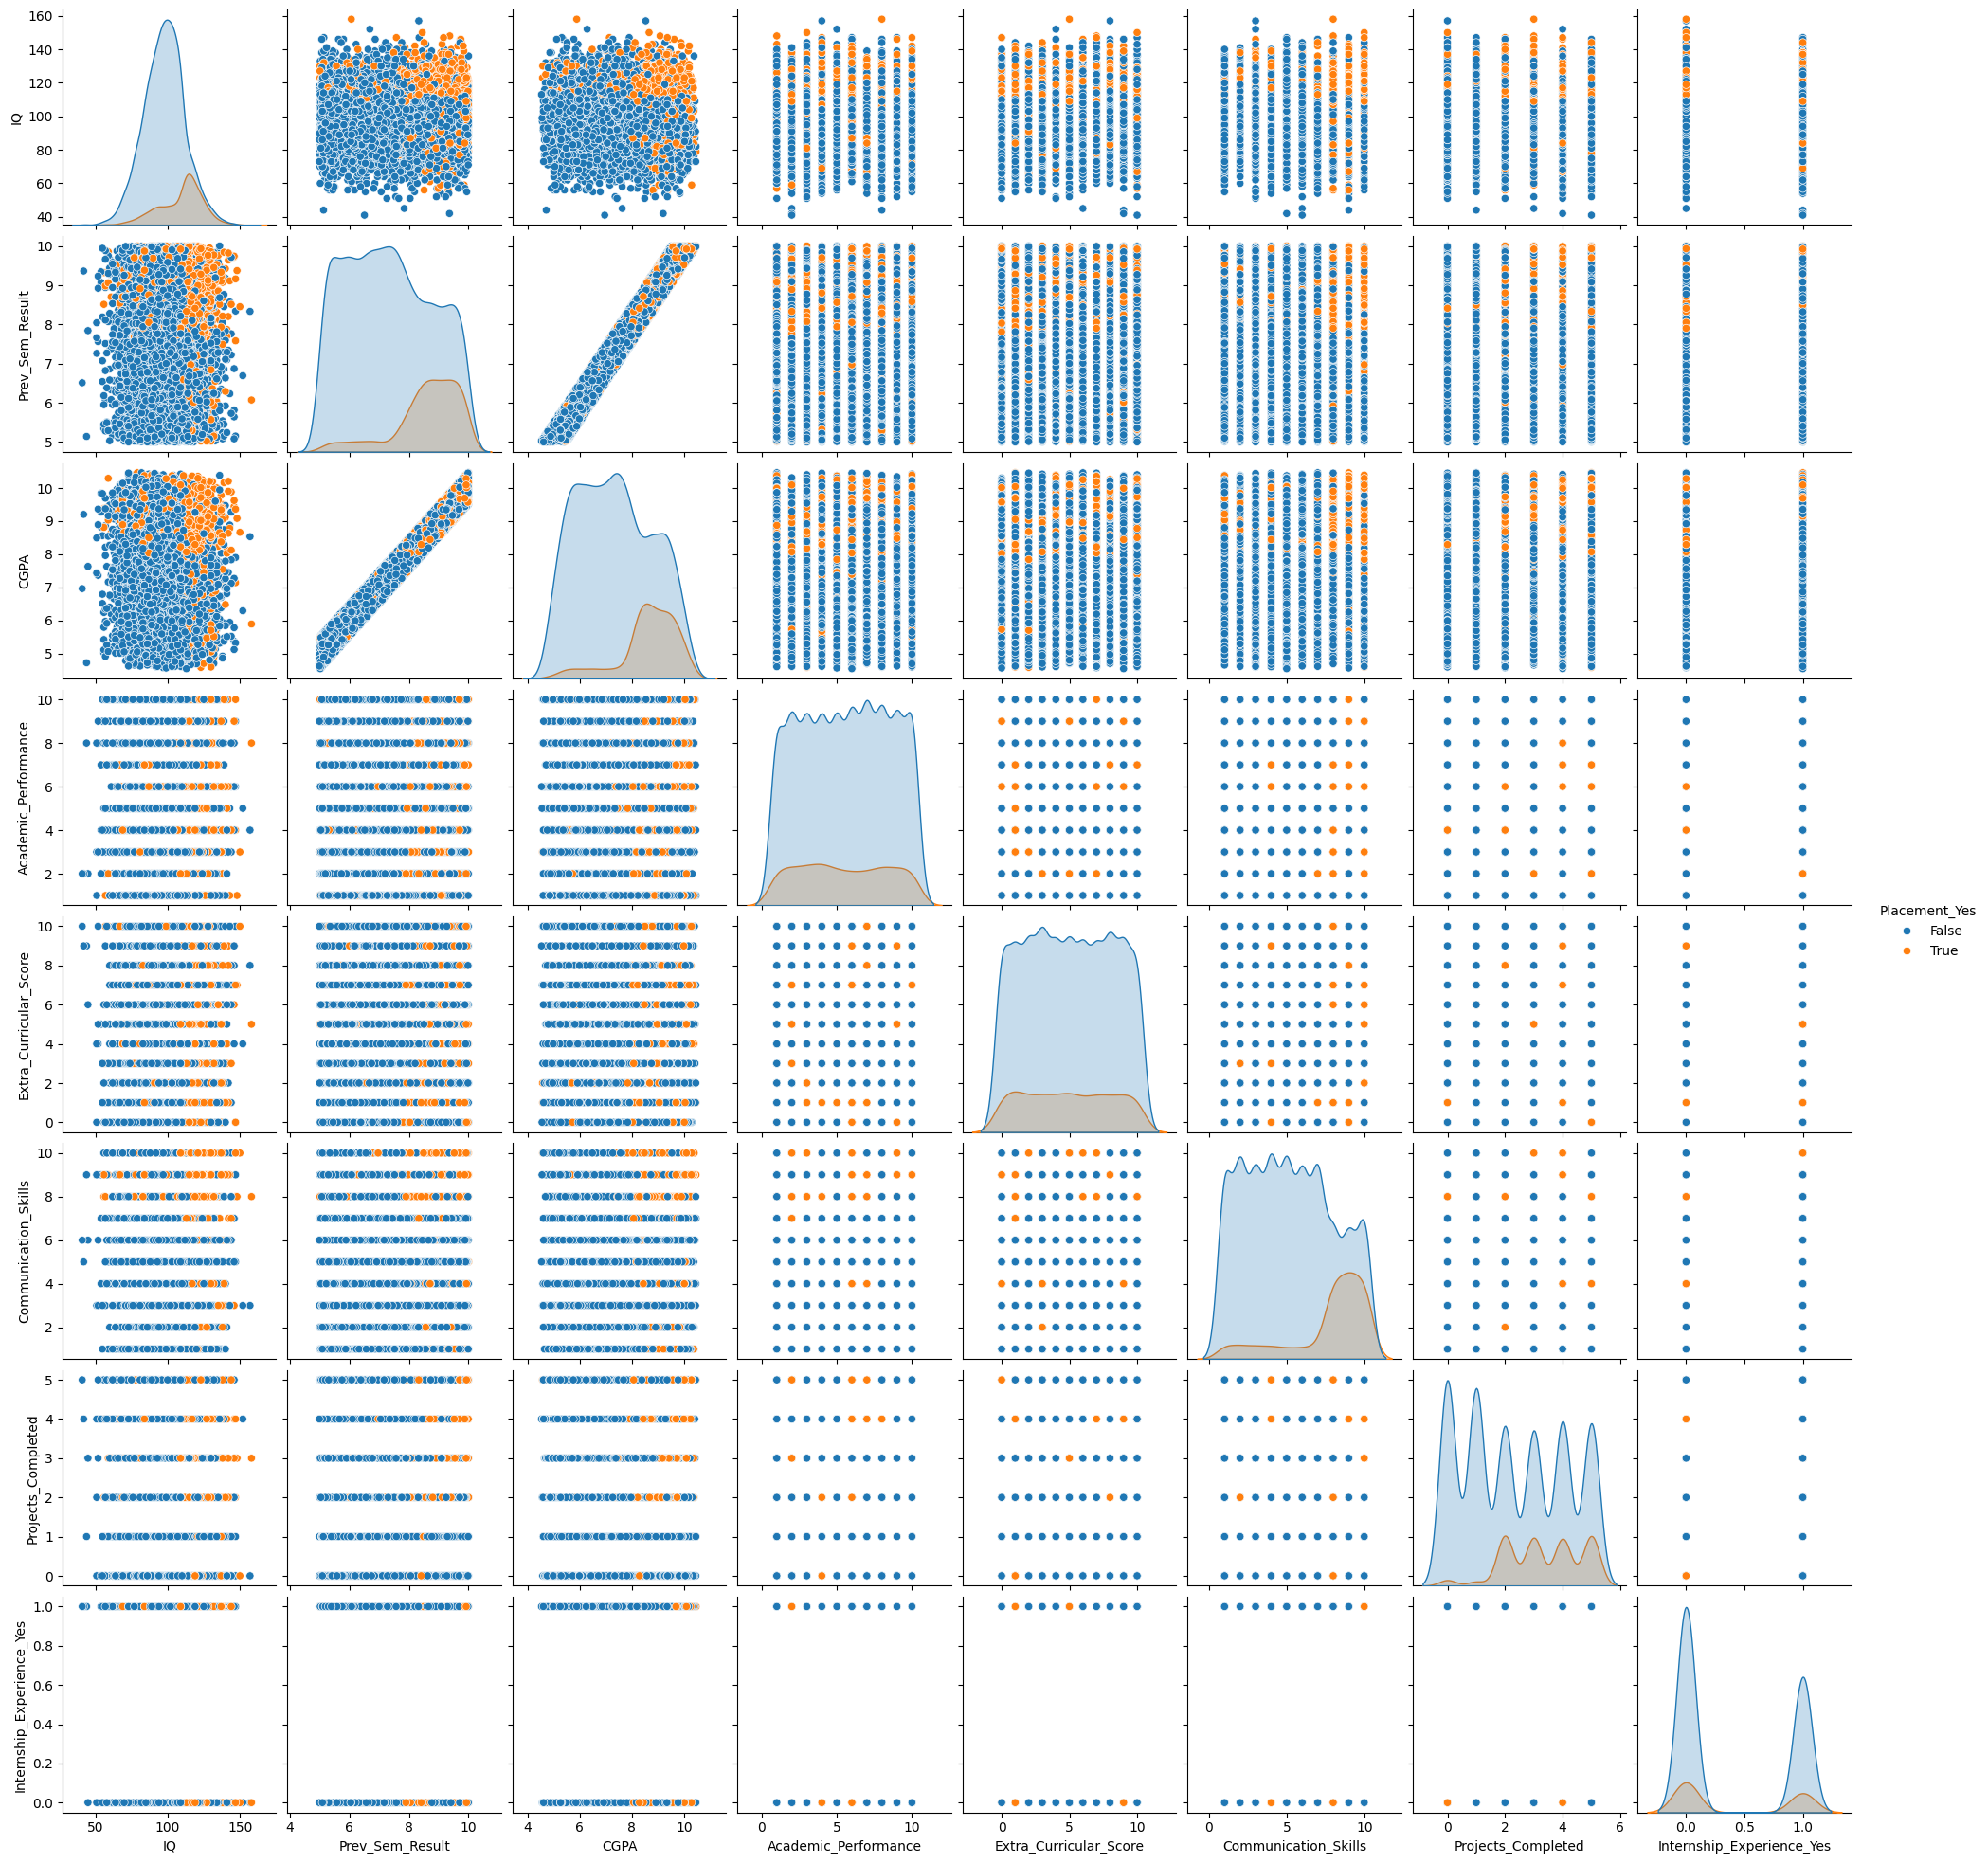

In [54]:
# Use sns.pariplot to visualize.
sns.pairplot(df, hue="Placement_Yes")


## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [56]:
# Set X to the desired features.
selected_features = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Internship_Experience_Yes']
X = df[selected_features]

# Set y to be our target variable. 
y = df['Placement_Yes']


## Split to Testing and Training Datasets 

In [57]:
# Split our data into testing and training pairs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the length and width of our testing data.
print('X_train: %d rows, %d columns' % X_train.shape)
print('X_test: %d rows, %d columns' % X_test.shape)
print('y_train: %d rows, 1 column' % y_train.shape)
print('y_test: %d rows, 1 column' % y_test.shape)

X_train: 8000 rows, 8 columns
X_test: 2000 rows, 8 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [60]:
# Initalize our logistic regressionmodel.
model = LogisticRegression(max_iter=500) # had to increase from 100 cause of some weird convergence issues


## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [61]:
# 1. Make predictions of your test data and save them as `y_pred`. 
model.fit(X=X_train, y=y_train)

y_pred = model.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False], shape=(2000,))

Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [63]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1_score)

Accuracy Score: 0.900500
Precision Score: 0.760148
Recall Score: 0.605882
F1 Score: 0.674304


Plot a confusion matrix of your predicted results.

Text(70.72222222222221, 0.5, 'Actual')

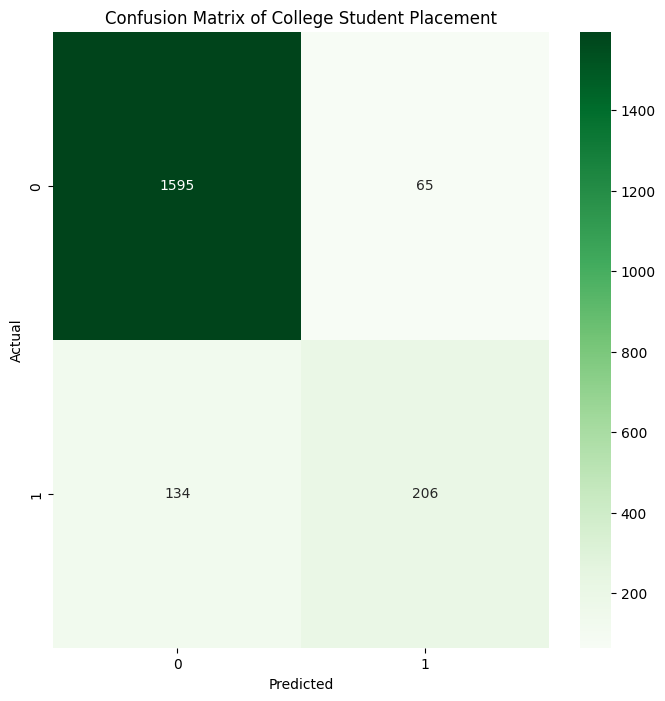

In [ ]:
# 3. Plot a confusion matrix of your predicted results.
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, cmap="Greens", fmt="g")
plt.title("Confusion Matrix of College Student Placement")
plt.xlabel("Predicted")
plt.ylabel("Actual")

How many true positives and true negatives did your model get?

In [69]:
# How many true positives and true negatives did your model get?

true_negatives, false_positives, false_negatives, true_positives = 1595, 65, 134, 206
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 1595
True Positives: 206


Such awful 😞

In [82]:
X

,const,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_Experience_Yes
0,1.0,107,6.61,6.28,8,8,8,4,False
1,1.0,97,5.52,5.37,8,7,8,0,False
2,1.0,109,5.36,5.83,9,3,1,1,False
3,1.0,122,5.47,5.75,6,1,6,1,True
4,1.0,96,7.91,7.69,7,8,10,2,False
...,...,...,...,...,...,...,...,...,...
9995,1.0,119,8.41,8.29,4,1,8,0,False
9996,1.0,70,9.25,9.34,7,0,7,2,False
9997,1.0,89,6.08,6.25,3,3,9,5,True
9998,1.0,107,8.77,8.92,3,7,5,1,False


# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [ ]:
# Add a constant term to the independent variables.
X = pd.get_dummies(df[selected_features], drop_first=True, dtype="int") # did not convert true/false to 1/0
X = X.astype(int)  # Convert all boolean columns to int
X = sm.add_constant(X)

y = y.astype(int)

# Fit the model.
model = sm.Logit(y, X).fit() # for some reason X and y had true/false values which is not allowed in statsmodels

# Print the summary and interpret the results.
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.216191
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Placement_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Wed, 15 Oct 2025   Pseudo R-squ.:                  0.5189
Time:                        02:32:53   Log-Likelihood:                -2161.9
converged:                       True   LL-Null:                       -4493.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -29.1059      0.734    -39.650      0.000     -30.

# Extra Credit: Use your brain and make a better model (as in better scores).



In [ ]:
# Define the new X variable, and reuse the same y variable from before.


# Split our data into testing and training. Remember to use the same random state as you used before


# Initalize our model.


# Fit-train our model using our training data.


# Make new predicitions using our testing data. 


# Print each of our scores to inspect performance.


# Plot the confusion matrix.
